In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from numba import njit
from mpl_toolkits.mplot3d import Axes3D

In [80]:
#Definimos los linspace para que el circulo quede mas grande
N=300
x= np.linspace(-1.1,1.1,N)
y= np.linspace(-1.1,1.1,N)

#Creamos la grilla de puntos dentro del circulo
X,Y= np.meshgrid(x,y)
mascara= X**2 + Y**2 >= 1

#Definimos nuestra condición adentro 
phi= np.random.rand(N,N)

theta= np.arctan2(Y,X)
phi_borde= np.sin(7*theta)


#Aplicamos la condición a los puntos sobre el borde del circulo
phi[mascara]= phi_borde[mascara]


In [50]:
#Ahora vamos a implementar el metodo para solucionar la ecuacion de poisson
@njit
def poisson(phif,X,Y,mascara,N,tol=1e-4,iter_max=5000):
    h= abs(X[0,1]-X[0,0])
    for e in range(iter_max):
        phi_n= np.copy(phif)
        for i in range(1,N-1):
            for j in range(1,N-1):
                if mascara[i,j]:
                    phi_n[i,j]=0.25*(phif[i+1,j]+phif[i-1,j]+phif[i,j+1]+phif[i,j-1]+4*np.pi*(X[i,j]+Y[i,j])*h**2)
        error= np.max(np.abs(phi_n-phif))
        #Modificamos el array para la siguiente iteración
        for i in range(N):
            for j in range(N):
                phif[i, j] = phi_n[i, j]
                
        if error < tol:
            break
    return phif


In [51]:
mascara_dentro= X**2 + Y**2 < 1

In [52]:
phi_x=poisson(phi,X,Y,mascara_dentro,N)


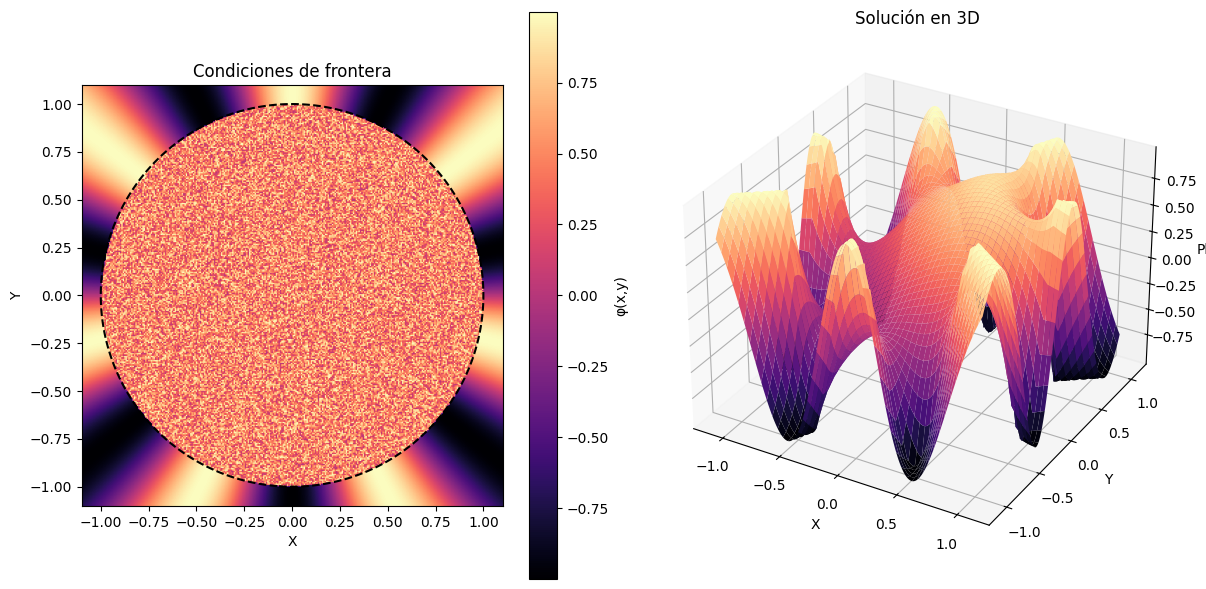

In [ ]:
fig = plt.figure(figsize=(12, 6))

R= X**2+Y**2

#  Contorno 2D 
ax1 = fig.add_subplot(1, 2, 1)
im = ax1.imshow(phi, extent=[-1.1, 1.1, -1.1, 1.1], cmap="magma")
ax1.contour(X, Y, R, levels=[1], colors="black",origin="lower", linestyles="dashed")
fig.colorbar(im, ax=ax1, label="φ(x,y)")
ax1.set_title("Condiciones de frontera")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

#Solución 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, phi_x, cmap='magma', edgecolor='none')
ax2.set_title("Solución en 3D")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Phi")

plt.tight_layout()  
plt.savefig("solucion_poisson.png",dpi=300,bbox_inches="tight")